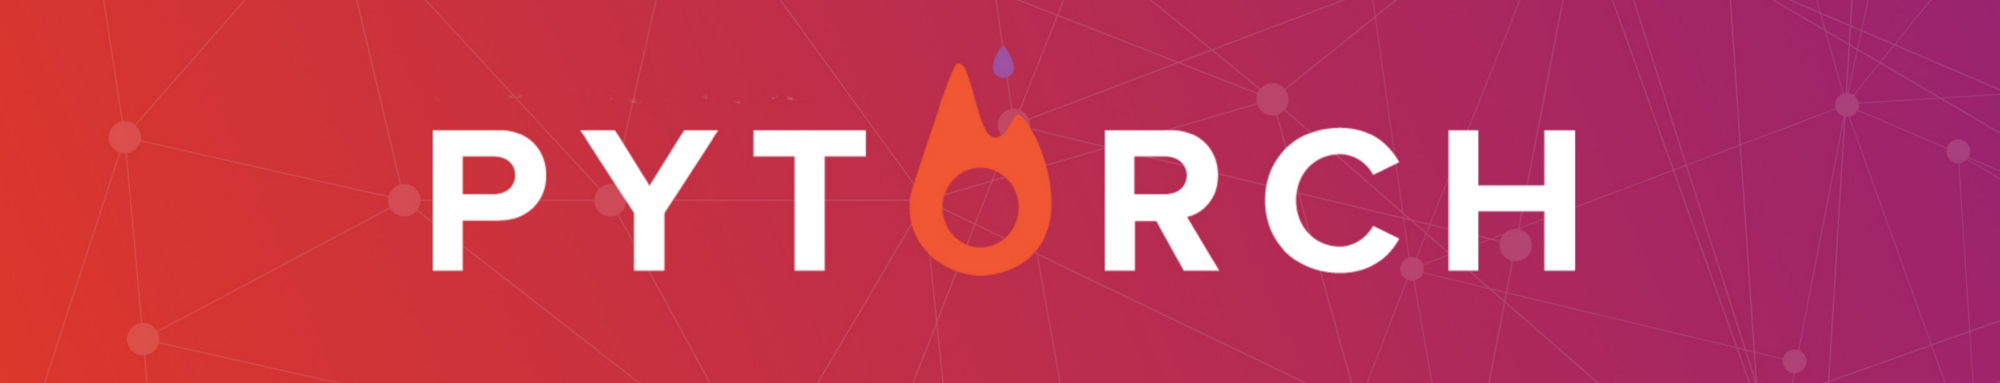

# PyTorch

## 1) - Introduction & installation


[PyTorch](https://pytorch.org/) is the most used framework when it comes to Machine Learning.\
Whether for computer vision or language processing, PyTorch allows you to build the state-of-the-art in AI.


Developed by Meta AI, PyTorch is now part of the Linux foundation and is completely [open-source](https://github.com/pytorch/pytorch).\
When you hear about deep learning, PyTorch is never far away as it is present in Tesla cars, it is used by Google, AMD, Nvidia, AWS, Microsoft, Meta, Netflix and many others !

As you can see, PyTorch has distinguished itself as the AI framework par excellence.

### Installation

You will have noticed it in the name, **Py**Torch takes the form of a **Python library**. It's also called Torch more generally.

You will find the commands to install PyTorch on this page depending on your development environment : https://pytorch.org/ \
You can for example specify that you use ``conda`` with ``CUDA 11.3``.

> The [CUDA](https://developer.nvidia.com/cuda-toolkit) version can be important depending on your GPU.
For example, I have an NVIDIA GeForce RTX 3050 TI graphics card (I'm showing off a bit) and the 515.65.01 driver, and CUDA 10.2 is too old for my hardware.

### Why use PyTorch

But do you know what PyTorch is for?

If I'm not mistaken, you created a neural network from scratch yesterday. Now imagine that you have millions of parameters, a complex architecture and that you have to create a neural network from scratch every time.

Well, **PyTorch allows you to build neural networks very easily**, forget about the mathematics behind it and build complex neural networks in a few functions and parameters. 

Excuse me, **don't entirely forget the mathematics**, they will help you to understand why your loss doesn't decrease ;)

## 2) - Data & Tensors

Data is the essence of any neural network.\
However this data can be in different formats, sometimes incomplete, sometimes as a string, sometimes as a float ...

In PyTorch our data is in the form of Tensors, we will see just after what a Tensor is.

### Step 1 - Import modules

Let's start by importing ``torch``, ``math`` and ``numpy``.

In [ ]:
## import torch, math, and numpy

# code here (~ 2 lines)

### What is a Tensor ?

As I told you before, the data in PyTorch is in the form of tensors.

Concretely, a **Tensor is an object** that is similar to an array or a matrix.\
Actually, tensors are **similar to arrays in Numpy** with a **few differences**.

The main strength of tensors is that **they can run on GPUs** or other hardware acceleration devices.\
You may already know this, but AI models are often accelerated using graphics cards.

In addition, **Tensors are optimized to calculate gradients** in the gradient descent algorithm.\
If you remember gradient descent is the algorithm that allows to adjust the weights of our neural network and thus to make it learn new things.

In short, Tensors are used to encode the input and output data of our neural networks as well as the weights of our networks.\
They have the advantage of being able to run on a GPU and to be optimized for gradient descent.

### Step 2 - Build a Tensor from data

In this first exercise you will have to **create a tensor** from the array ``data``\
Be careful, the tensor must be built from the array and thus contain the same data.
> You might want to take a look to the [documentation](https://pytorch.org/docs/stable/tensors.html)

The assert is there to check that you have the expected result.

In [ ]:
data = [[1, 2],[3, 4]]

### code here (~ 1 line)

assert torch.is_tensor(x_data), "Your object is not a tensor"

### Step 3 - Build a Tensor from shape

One of the many interesting features of PyTorch is that you can generate Tensors from shapes.\
This can be useful when you want to initialize neural network weights for example.

Create a Tensor **filled with 0** and of shape ``(2, 3,)``.

In [ ]:
shape = (2,3,)

### code here (~ 1 line)

assert zeros_tensor.sum().item() == 0, "Your tensor is not filled with zeros."
assert list(zeros_tensor.shape) == [2, 3], "Your tensor does not have a shape (2, 3,)"

### Step 4 - Print Tensor's attributes

You now know how to create a tensor.\
Display **three pieces of information** about this tensor:

* Its shape
* The data type of the tensor
* The device on which the tensor is stored

Don't hesitate to take a look at the [documentation](https://pytorch.org/docs/stable/tensor_attributes.html)

In [ ]:
tensor = torch.rand(3,4)

### code here - Add the good attributes

**Expected Result**:

Shape of tensor: **torch.Size([3, 4])**\
Datatype of tensor: **torch.float32**\
Device tensor is stored on: **cpu**

### Step 5 - Use GPU if available

If you look carefully at which device your tensor is stored on, it will be on your CPU even if you have a GPU.
And this is normal.\
If you don't indicate that you want to store your tensor on your GPU then it will use the CPU by default.

Look at the [documentation](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) about this.\
For checking if cuda is available [check this](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).

Add a condition to know if a GPU is available, if it is the case move your tensor on your GPU.

In [ ]:
# We move our tensor to the GPU if available

### code here (~ 2 lines)

### Step 6 - Apply an arithmetic operation to a Tensor

In the same way as for a numpy array, one can easily apply arithmetic operations on a Tensor.

Multiply the data of the Tensor by **42**.

In [ ]:
tensor = torch.ones((3, 3), dtype=torch.float)

### code here (~ 1 line)

assert int(tensor.sum().item()) == 378, 'The tensor is not multiply by 42.'

### Step 7 - Reshape a Tensor

Again in the same way as a numpy array, you can reshape your Tensor using the ``reshape`` method.

Turn your shape tensor ``(3, 9)`` into a shape tensor ``(3, 3, 3)``.

In [ ]:
tensor = torch.ones((3, 9), dtype=torch.float)

### code here (~ 1 line)

assert list(tensor.shape) == [3, 3, 3], "Your tensor does not have a shape (3, 3, 3)"

## 3) - Neural Network with PyTorch

### Step 8 - How build a Neural Network with PyTorch

#### Part I - How to build NN from Scratch

This step will take longer than the previous ones.\
You will not have to code, but I advise you to examine the code in detail to succeed in the next step.

> **If you have any questions, don't hesitate, go see a supervisor** !

In order to facilitate your understanding, I've built a neural network from scratch which works with tensors below, you can find the code [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).\
We just added some comments to help you better.

Then you will see how we develop the equivalent using PyTorch to its full potential!

So here is our NN from scratch, read the comments carefully ! 

In [ ]:
## First, we define a variable for the type of our tensor
## Then, we define a variable which will contain our device, to use the GPU if possible
## We also define the learning_rate and the number of training epochs.
DTYPE = torch.float
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LR = 1e-6
EPOCHS = 2001


## We generate data equally spaced between -3.14 and 3.14
## The objective is to predict the result of the sin function.
x = torch.linspace(-math.pi, math.pi, 2000, device=DEVICE, dtype=DTYPE)
y = torch.sin(x)

## We initialize four weights randomly.
## We could also initialize them to zero anyway.
a = torch.randn((), device=DEVICE, dtype=DTYPE)
b = torch.randn((), device=DEVICE, dtype=DTYPE)
c = torch.randn((), device=DEVICE, dtype=DTYPE)
d = torch.randn((), device=DEVICE, dtype=DTYPE)

## We start our training loop
## We loop our number of epochs
for t in range(EPOCHS):
    
    ## We apply forward propagation.
    ## That is to say that we calculate the prediction of our neural network.
    ## The fact that we put our input data to powers allows to add difficulty.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    ## Obviously our prediction is not very good yet.
    ## For this we will calculate the error.
    ## We use the loss function MSE, (prediction - truth)²
    ## As a reminder, the objective is to lower this loss by modifying the weights
    ## So we will print this loss and see if it goes down ;)
    loss = (y_pred - y).pow(2).sum().item()
    if t % 500 == 0:
        print(f'Iteration : {t},  \tLoss Value : {loss:.2f}.')

    ## We can calculate our gradients
    ## You saw these calculations yesterday
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    ## Update weights using gradient descent
    ## Don't forget to apply the learning_rate to avoid missing the minimum
    a -= LR * grad_a
    b -= LR * grad_b
    c -= LR * grad_c
    d -= LR * grad_d
    
## Here are your weight values at the end of the workout
print(f'\nFinal NN: y = {a.item():.2f} + {b.item():.2f} x + {c.item():.2f} x^2 + {d.item():.2f} x^3')

#### Part II - How to build NN with Torch

Overall, **the previous step was a reminder** of what you did yesterday.\
Now we'll see how to do it in a few lines with PyTorch.

The result will be the same as the previous code cell, but without the math formulas **it will be magic** so here we go :D

**Don't forget to take the time to understand the whole code**, soon it will be your turn to create a neural network.\
I added a lot of comments, but if you remove the comments you can see that we have created a neural network in a few lines.

In [ ]:
## As before, we define our hyperparameters
DTYPE = torch.float
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LR = 1e-2
EPOCHS = 2001

## Here is the part where the power of PyTorch appears
## We create a class that inherits from torch.nn.Module which is the base class for all NN
class MyNeuralNetwork(torch.nn.Module):
    
    ## Here we will define our different layers
    ## Super allows you to call the constructor of the parent torch.nn.Module
    ## The Linear layer corresponds to a + bx + cx + dx in the previous code
    ## The Flatten layer allows you to transform the predictions into a single array
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(3, 1),
            torch.nn.Flatten(0, 1)
        )
    ## The forward part, which consists in making the prediction
    ## We take a data in parameter that we pass in our model and we return the result
    def forward(self, x):
        x = self.model(x)
        return x

## Similar to the previous code cell
x = torch.linspace(-math.pi, math.pi, 2000, device=DEVICE, dtype=DTYPE)
y = torch.sin(x)

## Here, we will simply put to the power 1, 2 and 3 each data.
## Remember our Linear layer corresponds to: a + bx + cx + dx
## And we want to have a + bx + cx^2 + dx^3
p = torch.tensor([1, 2, 3]).to(DEVICE)
xx = x.unsqueeze(-1).pow(p).to(DEVICE)

## We create an instance of our model and store it on our GPU if possible
## Then we will use the MSE loss as before but using PyTorch this time
## Then we define an optimizer, the optimizer allows to apply the gradient descent
## We use Adam which is an optimized gradient descent
model = MyNeuralNetwork().to(DEVICE)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

## Finally the most interesting step: training
## As usual we will iterate on the number of EPOCHS
for t in range(EPOCHS):

    ## We get the prediction of our model using the forward method
    y_pred = model.forward(xx)

    ## Here we need to calculate the loss, but no need for any math: PyTorch takes care of it !
    ## We print the loss every 500 EPOCHS
    loss = loss_fn(y_pred, y)
    if t % 500 == 0:
        print(f'Iteration : {t},  \tLoss Value : {loss.item():.2f}.')

    ## And then you will observe the magic of PyTorch
    ## We reset the gradients to zero before starting the backward
    optimizer.zero_grad()
    
    ## We compute our gradients
    loss.backward()
    
    ## We apply the gradient descent
    ## And here is the finished training :)
    optimizer.step()
    
## Here I'm just getting my weights to display their values
## You should notice that the result is similar to the one in the previous code cell
linear_layer = model.model[0]
print(f'\nFinal NN: y = {linear_layer.bias.item():.2f} + {linear_layer.weight[:, 0].item():.2f} x + {linear_layer.weight[:, 1].item():.2f} x^2 + {linear_layer.weight[:, 2].item():.2f} x^3')

## 4) - Train your model from a CSV Dataset

You have seen **how to create a neural network** before.\
However we applied our AI to data that was generated in a rather simple way.

**In a real case**, the data is not so simple.\
I have made available to you a dataset that I generated in a more complex way.

The dataset can be found in the file ``air_quality_train.csv``.

Your goal will be to train an artificial intelligence model to predict if the air is breathable based on the oxygen and CO2 in the air.

>**The data has been generated**, and therefore does not correspond to reality.
It would be possible to reverse the way the data was generated, but that's not the point.
**I trust you to play the game.**

### Step 9 - Load data from a CSV

First, I will import the tools you will need.

Here is the list:

* **Dataset** is the base class of PyTorch to create its own datasets, take a look at [this](https://pytorch.org/docs/stable/data.html).
* **Pandas** which will allow us to read our CSV file, take a look at [this](https://pandas.pydata.org/docs/).
* **StandardScaler** which will allow to standardize the data, take a look at [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

I take this opportunity to define the most optimized ``DEVICE`` for your hardware configuration.

In [ ]:
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

We will create our **AirQualityDataset class** that will allow us to work with our dataset.\
Before we start, I advise you to look at what a [magic method in python](https://www.tutorialsteacher.com/python/magic-methods-in-python) is.

So to **summarize, this class** has **three methods**:

   * \_\_init\_\_(self, file_name) - **the constructor** that allows you to load and standardize the data.
     1) load your csv file ``air_quality_train.csv`` with pandas.
     2) get in ``x_train`` all the features, that is all the columns except the column that indicates if the air is breathable.
     3) Get in ``y_train`` the column that indicates if the air is breathable, that is the last column.
     4) Then use the ``StandardScaler`` object and its ``fit_transform(x_train)`` method to standardize the data and store the result in ``x_train``.
     5) transform your data into a tensor, don't forget to put your tensor on your ``DEVICE``.
--------------------   
   * \_\_len\_\_(self) - the magic ``__len__`` method that will allow to use the ``len`` function on our dataset. Simply return the length of ``y_train``.
--------------------
   * \_\_getitem\_\_(self, idx) - the magic ``__getitem__`` method which allows to access an element in the way of an array, example: array[0].\
   To do this, return the value stored at index ``idx`` respectively in ``x_train`` and in ``y_train``. 
   
> **Be careful**, this class is very important, here is a [guide](https://shashikachamod4u.medium.com/excel-csv-to-pytorch-dataset-def496b6bcc1) which can help you.

In [ ]:
class AirQualityDataset(Dataset):

    def __init__(self, file_name):
        file_out = # Read the csv file with pandas
        x = # Get all columns except the last
        y = # Get the last column

        # Feature Scaling
        sc = # Define the StandardScaler
        x_train = # Transform the data thanks to the fit_transform() method of sc
        y_train = y

        self.x_train = # Transform x_train into a tensor on your DEVICE
        self.y_train = # Transform y_train into a tensor on your DEVICE

    def __len__(self):
        # return the length of the dataset
        return None

    def __getitem__(self, idx):
        # return a tuple with (x, y) at the idx given in parameter
        return None
    
air_dataset = AirQualityDataset('air_quality_train.csv')
assert len(air_dataset) == 10000, "Your class doesn't have a proper __len__(self) method"

If your AirQualityDataset class is correct, you will be able to define a DataLoader from your class.

A DataLoader will allow us to iterate through our dataset in batches.\
A DataLoader can also shuffle the data.

Here is the example from the [documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders)

Define the ``train_loader`` variable with:
* ``air_dataset`` as Dataset
* ``32`` as batch_size
* ``true`` for Shuffle

In [ ]:
train_loader = None

### Step 10 - Build your own Neural Network

Let's put the data aside for now,
You will now build your neural network.

Before that, let's define two variables:

* ``EPOCHS`` which corresponds to the number of iterations of your training.
* ``LEARNING_RATE`` which is the speed at which your gradient descent converges.

You are free to change the value of these variables in order to optimize your results later on.

In [ ]:
EPOCHS = 10
LEARNING_RATE = 0.01

Let's build our neural network.\
Don't hesitate to check **the previous model I built above**

1) Create a class ``NeuralNetwork`` which inherits from ``torch.nn.Module``.
2) In its constructor ``__init__(self)``, call ``super(NeuralNetwork, self).__init__()``.
3) In the constructor set the ``model`` variable to a ``torch.nn.Sequential()``.
4) ``model`` must contain two layers, a ``torch.nn.Linear`` layer with **2 inputs and 1 output**, and a ``torch.nn.Sigmoid`` layer.
5) Define a method ``forward(self, x)`` which will return ``self.model(x)``

In [ ]:
# code here (~ 7/8 lines)

    
model = NeuralNetwork().to(DEVICE)
assert model.forward(torch.tensor([2.0, 1.0]).to(DEVICE)).item() >= 0 and model.forward(torch.tensor([2.0, 1.0]).to(DEVICE)).item() <= 1, "Your forward doesn't return a Sigmoid value." 

Great, you've done the hardest part!

Now we will define our ``criterion`` and our ``optimizer``.

The ``criterion`` corresponds to our loss, for the loss I advise you to use ``torch.nn.BCEWithLogitsLoss``.\
This allows you to combine the sigmoid function with your loss, very useful for doing binary classification which is what we are going to do.

``optimizer`` is our gradient descent algorithm and ``torch.optim.Adam`` is a go-to for this kind of problem.

In [ ]:
criterion = None
optimizer = None

### Step 11 - Train your Neural Network

We now have all the tools to train our neural network.

Before all that, let's define a ``binary_acc`` function which will display the accuracy of our model.\
For that, our function takes two tensors as parameters, a ``y_pred`` tensor which corresponds to the prediction and a ``y_test`` tensor which corresponds to the labels.

Here is the formula to implement:

$$Accuracy=\frac{Number\:of\:good\:predictions}{Total\:number\:of\:predictions}$$

In [ ]:
def binary_acc(y_pred, y_test):
    
    ## code here (~5 lines)

assert binary_acc(torch.tensor([2.0, 3.0, 5.0, 9.0]).to(DEVICE), torch.tensor([2.0, 4.0, 5.0, 9.0]).to(DEVICE)) == 75.0, "Your binary_acc does not work well !"

Now you have everything you need to complete the training loop.

Let's summarize the different steps:

* 1) - Create a loop that will iterate over the number of ``EPOCHS``.
* 2) - Loop for X_batch and Y_batch in the train_loader
* 3) - Get the prediction from your model
* 4) - Calculate the loss with your criterion
* 5) - Calculate the accuracy with ``binary_acc``.
* 6) - Reset your gradients to 0 with your ``optimizer``
* 7) - Calculate your gradients with your ``loss``.
* 8) - Apply the gradient descent with your ``optimizer``
* 9) - At the end of the epoch display the average ``loss`` and ``accuracy``.

If you do all these tasks well you should see your average loss decrease and your average accuracy increase.

**Goal: Achieve over 90% accuracy!**

In [ ]:
## code here (~10-15 lines)